In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Import data from CSV file
data_true = pd.read_csv('Data/True.csv')
data_fake = pd.read_csv('Data/Fake.csv')

# Make Label for True and False data
# Supervised Learning
data_true["class"] = 1
data_fake["class"] = 0

# Merge datas
data_merge = pd.concat([data_true, data_fake], axis=0)

In [5]:
# Drop useless tables
data = data_merge.drop(['title', 'subject', 'date'], axis=1)
data.shape

(44898, 2)

In [6]:
# Check if there are any NULL datas
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [7]:
# Randomize data so no Bias occurs
data = data.sample(frac=1)

# Reset index of data
data = data.reset_index(drop=True)
data

,text,class
0,A new parody video from the Gregory Brothers s...,0
1,"XIAMEN, China (Reuters) - Russia reserves the ...",1
2,A U.S. Army veteran was recently arrested on c...,0
3,"On December 9, an unidentified 41-year-old mot...",0
4,The adversity that former Congresswoman Gabby ...,0
...,...,...
44893,But O Donnell told Joy Reid on MSNBC s AM Joy...,0
44894,Godless heartless and without conscience .Sena...,0
44895,MOSCOW (Reuters) - At least two people died an...,1
44896,"If our next President is a Republican, and if ...",0


<Axes: xlabel='class', ylabel='count'>

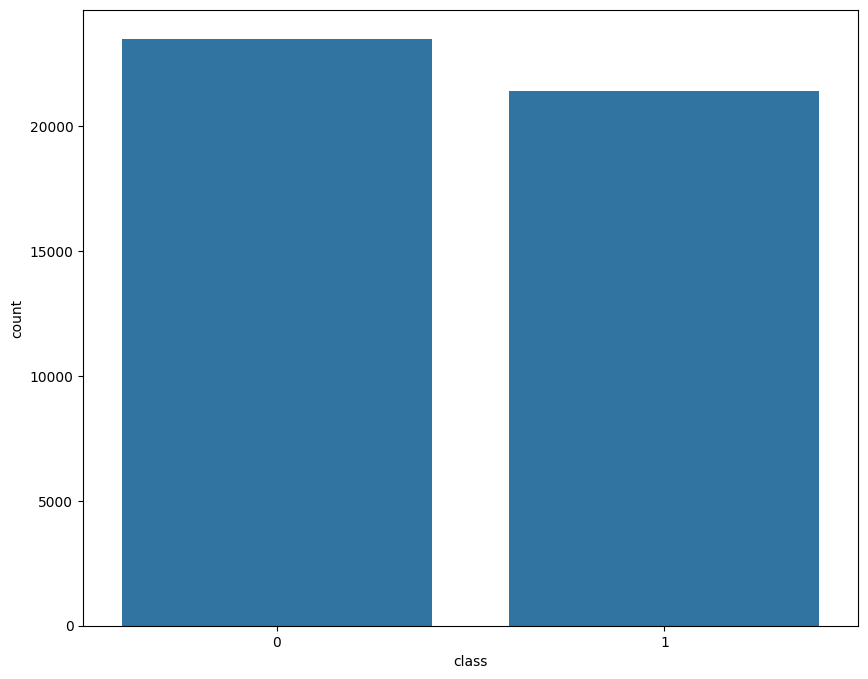

In [8]:
# Plotting to see difference in data frequencies
plt.figure(figsize=(10, 8))
sns.countplot(
    data=data,
    x='class',
    order=data['class'].value_counts().index
)

In [9]:
# Remove unwanted things from the text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Win\AppData\Local\Temp\ipykernel_19768\1221289499.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\Win\AppData\Local\Temp\ipykernel_19768\1221289499.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text)
C:\Users\Win\AppData\Local\Temp\ipykernel_19768\1221289499.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [10]:
# Apply function to text
data['text'] = data['text'].apply(wordopt)

In [11]:
# Split data to X dan y
X = data['text']
y = data['class']

In [12]:
# Split training and testing data
# Testing data will be 20% of original data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Machine understands numbers better than stings
# Vectorizer help to convert into unique vectors
vectorize = TfidfVectorizer()

# Use Fit transfrom for training data
xv_train = vectorize.fit_transform(x_train)

# Use transform for normal testing
xv_test = vectorize.transform(x_test)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# Fit training data to the model
model = LogisticRegression()
model.fit(xv_train, y_train)

LogisticRegression()

In [16]:
# Make a Prediction (1, 0) or (T, F)
pred = model.predict(xv_test)

# See Accuracy in the testing
model.score(xv_test, y_test)

0.9868596881959911

In [17]:
from sklearn.metrics import classification_report

# See precision, recall, and f1-score
# precision = True Positives / Labeled Positives
# recall = True Positives / All Positives 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4608
           1       0.99      0.99      0.99      4372

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



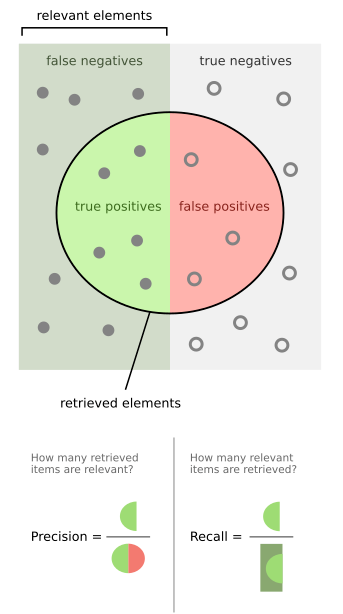

In [24]:
# Function for manual inputs
def output_label(n):
    if n == 0:
        return "Fake News."
    elif n == 1:
        return "Not Fake News."

def manual_testing(news):
    testing_news = {"text":[news]}
    df_test = pd.DataFrame(testing_news)
    
    df_test['text'] = df_test['text'].apply(wordopt)
    new_x = df_test['text']

    new_xv = vectorize.transform(new_x)
    new_pred = model.predict(new_xv)
    pred_proba = model.predict_proba(new_xv)
    confidence = pred_proba[0][new_pred[0]] * 100

    return print(f'Prediction: {output_label(new_pred[0])} ({confidence:.2f}% Confidence)')


In [27]:
news = str(input("Enter the news article: "))
manual_testing(news)

Prediction: Fake News. (58.52% Confidence)


Test Cases:

True: https://www.nbcnews.com/politics/donald-trump/trump-says-s-going-paris-first-trip-abroad-president-elect-rcna182567


Fake (From BBC Fake News Category): https://www.bbc.com/news/articles/c30p1p0j0ddo

True: https://www.nbcnews.com/news/world/biden-make-history-first-us-president-visit-angola-rcna182402